In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
test = pd.read_csv(r'D:\python\sns_for_sep.csv', encoding = 'euc-kr')

In [3]:
test.head()

,lv1,lv2,appln,fc_id_kipi,forward_citation_appln_no,ministry,from_node,피인용_출원일자,원래_출원일자,to_node,edge_label
0,4차산업혁명-lv3,바이오,102006000038554,KR10001179340B1,102010000109548,NaN,지식경제부,20101105,20060428,102010000109548,NaN
1,4차산업혁명-lv3,바이오,102008000089014,KR10001217867B1,102011000098936,교육부,교육과학기술부,20110929,20080909,교육부,바이오
2,4차산업혁명-lv3,바이오,102008000098751,KR10001613824B1,102015000123540,NaN,교육과학기술부,20150901,20081008,102015000123540,NaN
3,4차산업혁명-lv3,빅데이터,102007000006558,KR10001009924B1,102010000060280,교육과학기술부,문화체육관광부,20100625,20070122,교육과학기술부,빅데이터
4,4차산업혁명-lv3,빅데이터,102007000006558,KR10001048546B1,102009000019001,NaN,지식경제부,20090305,20070122,102009000019001,NaN


In [43]:
g=nx.DiGraph()

In [45]:
g=nx.from_pandas_dataframe(test, source = 'from_node', target = 'to_node', edge_attr='lv2', create_using = nx.DiGraph())

In [48]:
d = nx.degree(g)

c:\python35\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\python35\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\python35\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\python35\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


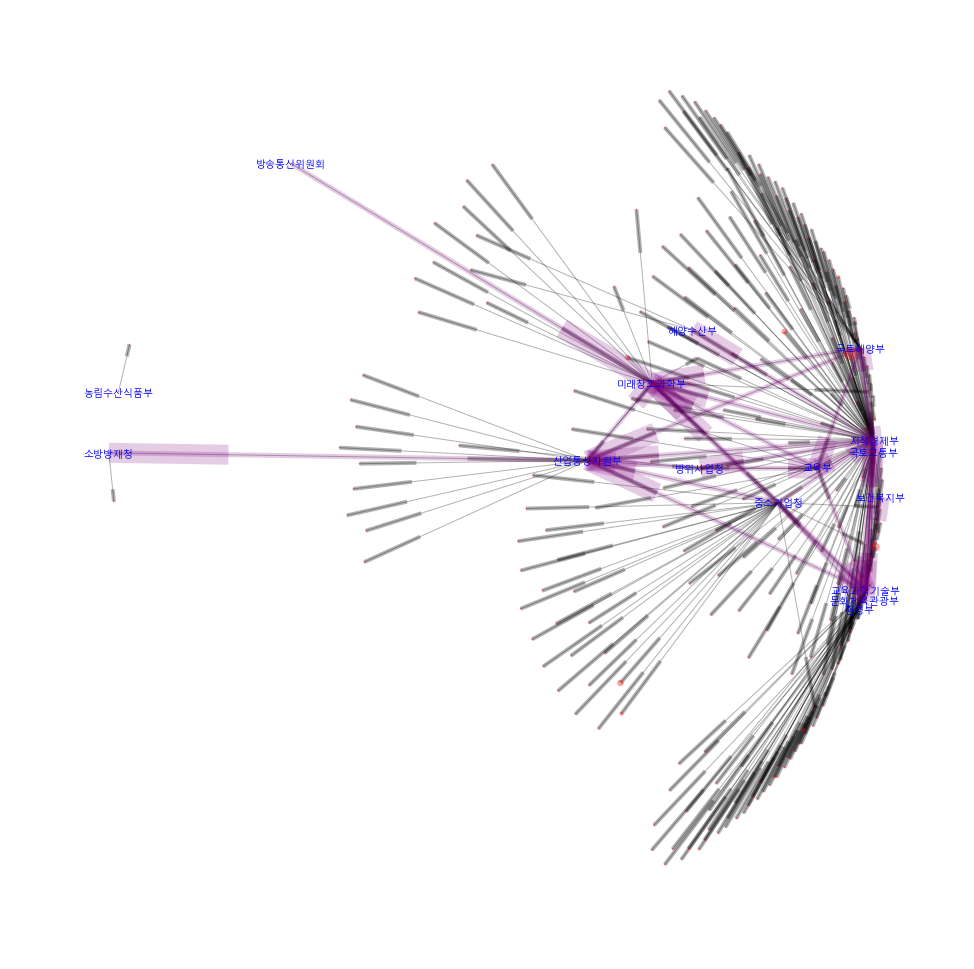

In [49]:
ministry = ['교육부', '지식경제부', '교육과학기술부', '문화체육관광부', '지식경제부', '미래창조과학부', '산업통상자원부', '국토해양부', '중소기업청', '교육부', '국토교통부', '소방방재청', '방위사업청', '보건복지부', '방송통신위원회', '해양수산부', '농림수산식품부', '환경부']

labels = {}
for node in g.nodes():
    if node in ministry:
        labels[node] = node

industry = ['바이오', '빅데이터', '스마트홈', '인공지능', '클라우드', '서비스용 로봇', '웨어러블 기술', '사물인터넷', '스마트시티', '자율주행차', '3D 프린팅']

labels_1 = {}
for edge in test['edge_label']:
    if edge in industry:
        labels_1[edge] = edge
    
edge_labels = nx.get_edge_attributes(g, 'labels_1')
    
plt.figure(figsize=(13,13))
layout=nx.spring_layout(g)
nx.draw(g, pos=layout, with_labels=False, font_size=10, alpha=0.3, node_size = [v for v in d.values()], font_family=font_name)
nx.draw_networkx_labels(g, layout, labels, font_size=10, font_color='b',  alpha=1, font_family=font_name)
special_edges = [('중소기업청', '산업통상자원부'),
 ('중소기업청', '문화체육관광부'),
 ('중소기업청', '미래창조과학부'),
 ('중소기업청', '교육과학기술부'),
 ('중소기업청', '지식경제부'),
 ('환경부', '문화체육관광부'),
 ('환경부', '지식경제부'),
 ('지식경제부', '교육과학기술부'),
 ('지식경제부', '산업통상자원부'),
 ('지식경제부', '지식경제부'),
 ('지식경제부', '방위사업청'),
 ('지식경제부', '미래창조과학부'),
 ('지식경제부', '국토교통부'),
 ('지식경제부', '교육부'),
 ('지식경제부', '문화체육관광부'),
 ('지식경제부', '국토해양부'),
 ('지식경제부', '해양수산부'),
 ('방위사업청', '산업통상자원부'),
 ('방위사업청', '방위사업청'),
 ('방위사업청', '교육부'),
 ('방송통신위원회', '미래창조과학부'),
 ('문화체육관광부', '교육과학기술부'),
 ('국토해양부', '산업통상자원부'),
 ('국토해양부', '미래창조과학부'),
 ('국토해양부', '국토해양부'),
 ('국토해양부', '국토교통부'),
 ('국토해양부', '교육부'),
 ('교육부', '미래창조과학부'),
 ('교육부', '교육과학기술부'),
 ('교육과학기술부', '산업통상자원부'),
 ('교육과학기술부', '미래창조과학부'),
 ('교육과학기술부', '교육과학기술부'),
 ('교육과학기술부', '보건복지부'),
 ('교육과학기술부', '국토교통부'),
 ('산업통상자원부', '미래창조과학부'),
 ('산업통상자원부', '산업통상자원부'),
 ('산업통상자원부', '소방방재청'),
 ('미래창조과학부', '미래창조과학부')]

edge_colours = ['black' if not edge in special_edges else 'red'
               for edge in g.edges()]
black_edges = [edge for edge in g.edges() if edge not in special_edges]
nx.draw_networkx_edges(g, layout, width = 5, edgelist = special_edges, edge_color= 'purple', alpha =.2, labels= edge_labels, arrows = True)
#nx.draw_networkx_edge_labels(g, layout, edgelist = special_edges, labels= edge_labels, label_pos=.7, font_family=font_name, font_size=8, alpha = 0.2, arrows=True)

plt.savefig('sep.png')
plt.show()

In [51]:
print("Number of nodes : ", nx.number_of_nodes(g))
print("Number of Edges : ", nx.number_of_edges(g))
degreelist = list(g.degree().values())
print("Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(g))
#print("Avg. Clustering Coefficient: ", nx.average_clustering(g))

Number of nodes :  271
Number of Edges :  303
Avg. Node Degree :  2.236162361623616


In [52]:
print("::: Betweennes Centrality")
x = nx.betweenness_centrality(g)

print("농림수산식품부:", x['농림수산식품부'])
print("지식경제부:", x['지식경제부'])
print("교육과학기술부:", x['교육과학기술부'])
print("문화체육관광부:", x['문화체육관광부'])
print("지식경제부:", x['지식경제부'])
print("미래창조과학부:", x['미래창조과학부'])
print("산업통상자원부:", x['산업통상자원부'])
print("국토해양부:", x['국토해양부'])
print("중소기업청:", x['중소기업청'])
print("교육부:", x['교육부'])
print("국토교통부:", x['국토교통부'])
print("소방방재청:", x['소방방재청'])
print("방위사업청:", x['방위사업청'])
print("보건복지부:", x['보건복지부'])
print("방송통신위원회:", x['방송통신위원회'])
print("해양수산부:", x['해양수산부'])
print("환경부:", x['환경부'])

::: Betweennes Centrality
농림수산식품부: 0.0
지식경제부: 0.007008123365000688
교육과학기술부: 0.0042521455780439674
문화체육관광부: 0.00012391573729863693
지식경제부: 0.007008123365000688
미래창조과학부: 0.004114461425489926
산업통상자원부: 0.002138693836339437
국토해양부: 0.0006195786864931846
중소기업청: 0.0034719353802377343
교육부: 0.0011129468998118317
국토교통부: 0.00011014732204323282
소방방재청: 0.0
방위사업청: 0.00041305245766212306
보건복지부: 5.507366102161641e-05
방송통신위원회: 0.0
해양수산부: 0.00011014732204323282
환경부: 0.0003855156271513149


In [53]:
print("::: Closeness Centrality")
z = nx.closeness_centrality(g)

print("농림수산식품부:", z['농림수산식품부'])
print("지식경제부:", z['지식경제부'])
print("교육과학기술부:", z['교육과학기술부'])
print("문화체육관광부:", z['문화체육관광부'])
print("지식경제부:", z['지식경제부'])
print("미래창조과학부:", z['미래창조과학부'])
print("산업통상자원부:", z['산업통상자원부'])
print("국토해양부:", z['국토해양부'])
print("중소기업청:", z['중소기업청'])
print("교육부:", z['교육부'])
print("국토교통부:", z['국토교통부'])
print("소방방재청:", z['소방방재청'])
print("방위사업청:", z['방위사업청'])
print("보건복지부:", z['보건복지부'])
print("방송통신위원회:", z['방송통신위원회'])
print("해양수산부:", z['해양수산부'])
print("환경부:", z['환경부'])

::: Closeness Centrality
농림수산식품부: 0.003703703703703704
지식경제부: 0.6669040835707503
교육과학기술부: 0.5160567313345091
문화체육관광부: 0.3637658637658638
지식경제부: 0.6669040835707503
미래창조과학부: 0.10693069306930694
산업통상자원부: 0.08709677419354839
국토해양부: 0.43713040771864303
중소기업청: 0.12
교육부: 0.07941176470588235
국토교통부: 0.007407407407407408
소방방재청: 0.06452674897119341
방위사업청: 0.057754010695187166
보건복지부: 0.003703703703703704
방송통신위원회: 0.07181861348528015
해양수산부: 0.007407407407407408
환경부: 0.025925925925925925


Degree Centrality

In [54]:
print("::: Degree Centrality")
j = nx.degree_centrality(g)

print("농림수산식품부:", j['농림수산식품부'])
print("지식경제부:", j['지식경제부'])
print("교육과학기술부:", j['교육과학기술부'])
print("문화체육관광부:", j['문화체육관광부'])
print("지식경제부:", j['지식경제부'])
print("미래창조과학부:", j['미래창조과학부'])
print("산업통상자원부:", j['산업통상자원부'])
print("국토해양부:", j['국토해양부'])
print("중소기업청:", j['중소기업청'])
print("교육부:", j['교육부'])
print("국토교통부:", j['국토교통부'])
print("소방방재청:", j['소방방재청'])
print("방위사업청:", j['방위사업청'])
print("보건복지부:", j['보건복지부'])
print("방송통신위원회:", j['방송통신위원회'])
print("해양수산부:", j['해양수산부'])
print("환경부:", j['환경부'])

::: Degree Centrality
농림수산식품부: 0.003703703703703704
지식경제부: 0.5370370370370371
교육과학기술부: 0.21481481481481482
문화체육관광부: 0.02962962962962963
지식경제부: 0.5370370370370371
미래창조과학부: 0.08888888888888889
산업통상자원부: 0.07037037037037037
국토해양부: 0.08518518518518518
중소기업청: 0.11111111111111112
교육부: 0.03333333333333333
국토교통부: 0.018518518518518517
소방방재청: 0.007407407407407408
방위사업청: 0.02592592592592593
보건복지부: 0.007407407407407408
방송통신위원회: 0.003703703703703704
해양수산부: 0.011111111111111112
환경부: 0.03333333333333333


In [55]:
print("::: Degree")
y= g.degree()

print("농림수산식품부:", y['농림수산식품부'])
print("지식경제부:", y['지식경제부'])
print("교육과학기술부:", y['교육과학기술부'])
print("문화체육관광부:", y['문화체육관광부'])
print("지식경제부:", y['지식경제부'])
print("미래창조과학부:", y['미래창조과학부'])
print("산업통상자원부:", y['산업통상자원부'])
print("국토해양부:", y['국토해양부'])
print("중소기업청:", y['중소기업청'])
print("교육부:", y['교육부'])
print("국토교통부:", y['국토교통부'])
print("소방방재청:", y['소방방재청'])
print("방위사업청:", y['방위사업청'])
print("보건복지부:", y['보건복지부'])
print("방송통신위원회:", y['방송통신위원회'])
print("해양수산부:", y['해양수산부'])
print("환경부:", y['환경부'])

::: Degree
농림수산식품부: 1
지식경제부: 145
교육과학기술부: 58
문화체육관광부: 8
지식경제부: 145
미래창조과학부: 24
산업통상자원부: 19
국토해양부: 23
중소기업청: 30
교육부: 9
국토교통부: 5
소방방재청: 2
방위사업청: 7
보건복지부: 2
방송통신위원회: 1
해양수산부: 3
환경부: 9


In [56]:
print("::: In Degree")
e= nx.in_degree_centrality(g)

print("농림수산식품부:", e['농림수산식품부'])
print("지식경제부:", e['지식경제부'])
print("교육과학기술부:", e['교육과학기술부'])
print("문화체육관광부:", e['문화체육관광부'])
print("지식경제부:", e['지식경제부'])
print("미래창조과학부:", e['미래창조과학부'])
print("산업통상자원부:", e['산업통상자원부'])
print("국토해양부:", e['국토해양부'])
print("중소기업청:", e['중소기업청'])
print("교육부:", e['교육부'])
print("국토교통부:", e['국토교통부'])
print("소방방재청:", e['소방방재청'])
print("방위사업청:", e['방위사업청'])
print("보건복지부:", e['보건복지부'])
print("방송통신위원회:", e['방송통신위원회'])
print("해양수산부:", e['해양수산부'])
print("환경부:", e['환경부'])

::: In Degree
농림수산식품부: 0.0
지식경제부: 0.011111111111111112
교육과학기술부: 0.011111111111111112
문화체육관광부: 0.003703703703703704
지식경제부: 0.011111111111111112
미래창조과학부: 0.02962962962962963
산업통상자원부: 0.02592592592592593
국토해양부: 0.007407407407407408
중소기업청: 0.014814814814814815
교육부: 0.014814814814814815
국토교통부: 0.011111111111111112
소방방재청: 0.0
방위사업청: 0.014814814814814815
보건복지부: 0.003703703703703704
방송통신위원회: 0.0
해양수산부: 0.003703703703703704
환경부: 0.007407407407407408


In [57]:
print("::: Out Degree")
s= nx.out_degree_centrality(g)

print("농림수산식품부:", s['농림수산식품부'])
print("지식경제부:", s['지식경제부'])
print("교육과학기술부:", s['교육과학기술부'])
print("문화체육관광부:", s['문화체육관광부'])
print("지식경제부:", s['지식경제부'])
print("미래창조과학부:", s['미래창조과학부'])
print("산업통상자원부:", s['산업통상자원부'])
print("국토해양부:", s['국토해양부'])
print("중소기업청:", s['중소기업청'])
print("교육부:", s['교육부'])
print("국토교통부:", s['국토교통부'])
print("소방방재청:", s['소방방재청'])
print("방위사업청:", s['방위사업청'])
print("보건복지부:", s['보건복지부'])
print("방송통신위원회:", s['방송통신위원회'])
print("해양수산부:", s['해양수산부'])
print("환경부:", s['환경부'])

::: Out Degree
농림수산식품부: 0.003703703703703704
지식경제부: 0.5259259259259259
교육과학기술부: 0.20370370370370372
문화체육관광부: 0.02592592592592593
지식경제부: 0.5259259259259259
미래창조과학부: 0.05925925925925926
산업통상자원부: 0.044444444444444446
국토해양부: 0.07777777777777778
중소기업청: 0.0962962962962963
교육부: 0.018518518518518517
국토교통부: 0.007407407407407408
소방방재청: 0.007407407407407408
방위사업청: 0.011111111111111112
보건복지부: 0.003703703703703704
방송통신위원회: 0.003703703703703704
해양수산부: 0.007407407407407408
환경부: 0.02592592592592593
